In [22]:
import numpy as np
import pandas as pd
import datetime

from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./calendar.csv')
df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [15]:
listing_df=df.dropna()

In [16]:
listing_df.available.unique()


array(['t'], dtype=object)

In [17]:
listing_df

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00
...,...,...,...,...
1393207,10208623,2016-01-06,t,$87.00
1393208,10208623,2016-01-07,t,$87.00
1393211,10208623,2016-01-10,t,$87.00
1393212,10208623,2016-01-11,t,$87.00


In [26]:
df.reset_index(inplace=True)
listing_df[['year', 'month', 'day']] = listing_df['date'].str.split("-", expand = True)
listing_df
#listing_df['month']=listing_df['date'].month

,listing_id,date,available,price,year,month,day
0,241032,2016-01-04,t,$85.00,2016,01,04
1,241032,2016-01-05,t,$85.00,2016,01,05
9,241032,2016-01-13,t,$85.00,2016,01,13
10,241032,2016-01-14,t,$85.00,2016,01,14
14,241032,2016-01-18,t,$85.00,2016,01,18
...,...,...,...,...,...,...,...
1393207,10208623,2016-01-06,t,$87.00,2016,01,06
1393208,10208623,2016-01-07,t,$87.00,2016,01,07
1393211,10208623,2016-01-10,t,$87.00,2016,01,10
1393212,10208623,2016-01-11,t,$87.00,2016,01,11


In [30]:
listing_df['price']=listing_df['price'].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
listing_df['available']=listing_df['price'].replace('[\t,]', 1, regex=True).astype(int)

In [33]:
listing_df.groupby(listing_df.month)['price'].agg([ 'count','mean','min', 'max'])

,count,mean,min,max
month,,,,
01,64937,122.912176,12.0,1000.0
02,73321,124.293927,20.0,1000.0
03,83938,128.644488,20.0,1099.0
04,76037,135.097005,20.0,1099.0
05,79971,139.538183,20.0,1099.0
06,77244,147.473137,20.0,1099.0
07,74222,152.094150,20.0,1240.0
08,76347,150.656594,20.0,1250.0
09,77246,143.255949,20.0,1450.0


In [56]:
def my_agg(x):
    names = {
        'Availability': x['price'].count(),
        'AverageCost':  x['price'].mean(),
        'MinCost': x['price'].min(),
        'MaxCost':  x['price'].max(),
        }

    return pd.Series(names, index=['Availability', 'AverageCost', 'MinCost',
                                   'MaxCost'])
cost=listing_df.groupby(listing_df.month).apply(my_agg)
cost

,Availability,AverageCost,MinCost,MaxCost
month,,,,
01,64937.0,122.912176,12.0,1000.0
02,73321.0,124.293927,20.0,1000.0
03,83938.0,128.644488,20.0,1099.0
04,76037.0,135.097005,20.0,1099.0
05,79971.0,139.538183,20.0,1099.0
06,77244.0,147.473137,20.0,1099.0
07,74222.0,152.094150,20.0,1240.0
08,76347.0,150.656594,20.0,1250.0
09,77246.0,143.255949,20.0,1450.0


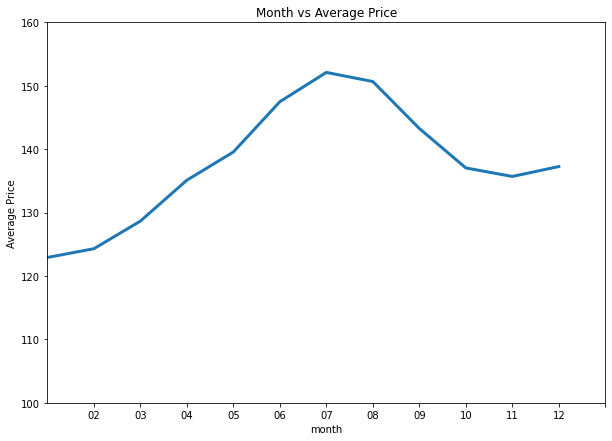

In [54]:
plt.figure(figsize=(10, 7))
plt.title('Month vs Average Price')
plt.ylabel('Average Price')
#plt.plot(x,y,linewidth=3.0)
plt.axis([0, 12, 100, 160])
x = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.grid(True)
plt.xticks(x)
listing_df.groupby(listing_df.month)['price'].mean().plot(kind="line",linewidth=3.0)
plt.show()